# QuTiP example: Physical implementation of Spin Chain Qubit model


Author: Anubhav Vardhan (anubhavvardhan@gmail.com)


For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
from qutip import *

In [3]:
from qutip.qip.models.circuitprocessor import *

In [4]:
from qutip.qip.models.spinchain import *
from qutip.qip import WhiteNoise

## Hamiltonian:


$\displaystyle H = - \frac{1}{2}\sum_n^N h_n \sigma_z(n) - \frac{1}{2} \sum_n^{N-1} [ J_x^{(n)} \sigma_x(n) \sigma_x(n+1) + J_y^{(n)} \sigma_y(n) \sigma_y(n+1) +J_z^{(n)} \sigma_z(n) \sigma_z(n+1)]$

The linear and circular spin chain models employing the nearest neighbor interaction can be implemented using the SpinChain class.

## Circuit Setup

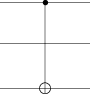

In [5]:
N = 3
qc = QubitCircuit(N)

qc.add_gate("CNOT", targets=[0], controls=[2])

qc.png

The non-adjacent interactions are broken into a series of adjacent ones by the program automatically.

In [6]:
U_ideal = gate_sequence_product(qc.propagators())

U_ideal

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]]

## Circular Spin Chain Model Implementation

In [7]:
p1 = CircularSpinChain(N, correct_global_phase=True)

U_list = p1.run(qc)

U_physical = gate_sequence_product(U_list)

U_physical.tidyup(atol=1e-5)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]]

In [8]:
(U_ideal - U_physical).norm()

0.0

The results obtained from the physical implementation agree with the ideal result.

In [9]:
p1.qc0.gates

[Gate(CNOT, targets=[0], controls=[2])]

The gates are first convert to gates with adjacent interactions moving in the direction with the least number of qubits in between.

In [10]:
p1.qc1.gates

[Gate(CNOT, targets=[0], controls=[2])]

They are then converted into the basis [ISWAP, RX, RZ]

In [11]:
p1.qc2.gates

[Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[2, 0], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RX, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(ISWAP, targets=[2, 0], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(RZ, targets=[0], controls=None),
 Gate(RZ, targets=[0], controls=None)]

The time for each applied gate:

In [12]:
p1.T_list

[1.25, 0.125, 0.125, 0.5, 0.125, 0.125, 1.25, 0.125, 0.5, 0.125, 0.125]

The pulse can be plotted as:

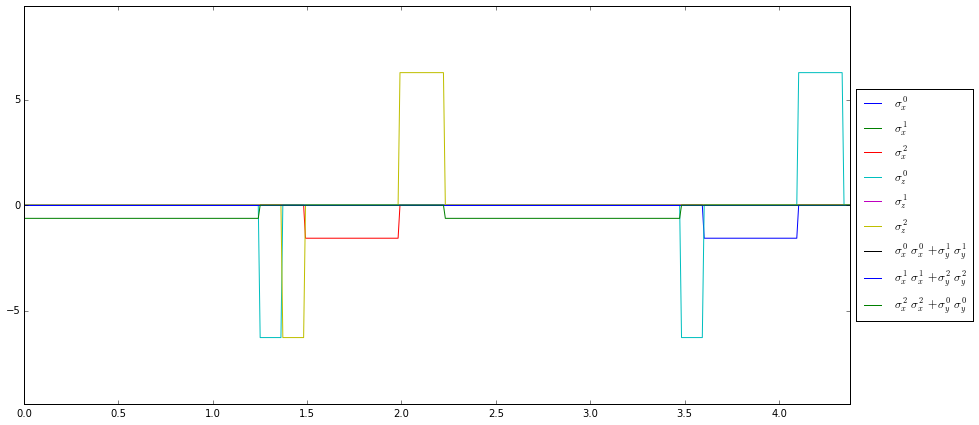

In [13]:
p1.plot_pulses();

## Linear Spin Chain Model Implementation

In [14]:
p2 = LinearSpinChain(N, correct_global_phase=True)

U_list = p2.run(qc)

U_physical = gate_sequence_product(U_list)

U_physical.tidyup(atol=1e-5)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]]

In [15]:
(U_ideal - U_physical).norm()

0.0

The results obtained from the physical implementation agree with the ideal result.

In [16]:
p2.qc0.gates

[Gate(CNOT, targets=[0], controls=[2])]

The gates are first convert to gates with adjacent interactions moving in the direction with the least number of qubits in between.

In [17]:
p2.qc1.gates

[Gate(SWAP, targets=[0, 1], controls=None),
 Gate(CNOT, targets=[1], controls=[2]),
 Gate(SWAP, targets=[0, 1], controls=None)]

They are then converted into the basis [ISWAP, RX, RZ]

In [18]:
p2.qc2.gates

[Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[1], controls=None),
 Gate(ISWAP, targets=[1, 0], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[2, 1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RX, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(RZ, targets=[2], controls=None),
 Gate(ISWAP, targets=[2, 1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RX, targets=[1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(RZ, targets=[1], controls=None),
 Gate(GLOBALPHASE, targets=None, controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[0], controls=None),
 Gate(ISWAP, targets=[0, 1], controls=None),
 Gate(RX, targets=[1], controls

The time for each applied gate:

In [19]:
p2.T_list

[1.25,
 0.5,
 1.25,
 0.5,
 1.25,
 0.5,
 1.25,
 0.125,
 0.125,
 0.5,
 0.125,
 0.125,
 1.25,
 0.125,
 0.5,
 0.125,
 0.125,
 1.25,
 0.5,
 1.25,
 0.5,
 1.25,
 0.5]

The pulse can be plotted as:

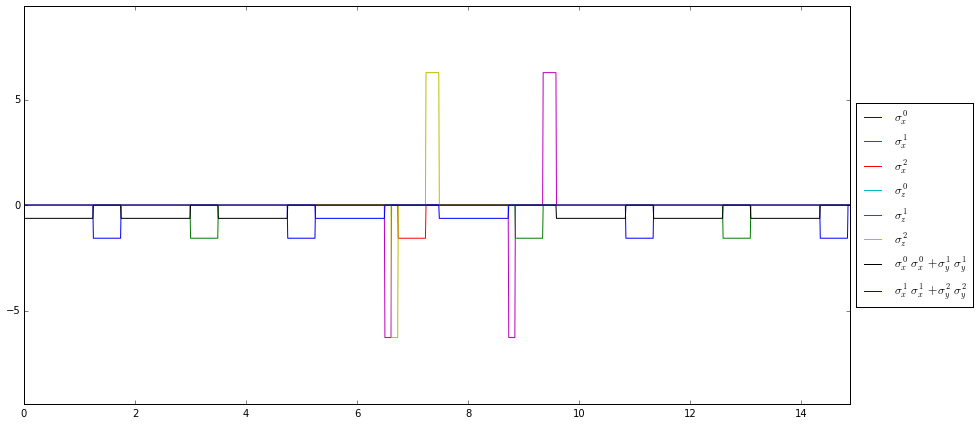

In [20]:
p2.plot_pulses();

## Numerical simulation
In the new version of QuTiP, we also add the possibility to allow numerical simulation with `SpinChain`-based quantum computing. One needs only to add an option in `run_state` to use the QuTiP solver instead of matrix production. The benefit is that, under numerical simulation, all the noise defined for the numerical `CircuitProcessor` can also be used for `SpinChain`

In [33]:
N = 1
plus_state = (basis(2,0) + basis(2,1)).unit()

qc = QubitCircuit(N=N)
qc.add_gate("SNOT", targets=0)
processor = LinearSpinChain(N=N)
processor.load_circuit(qc)
end_state = processor.run_state(rho0=basis(2, 0), numerical=True).states[-1]
fidelity(end_state, plus_state)

1.0000000052671838

In [34]:
processor.add_noise(WhiteNoise(mean=0.1, std=0.2, dt=0.1))
end_state = processor.run_state(rho0=basis(2, 0), numerical=True).states[-1]
fidelity(end_state, plus_state)

0.9984006811937123

Since the result of this this noise is still a pure state, we can visualize it on a Bloch sphere

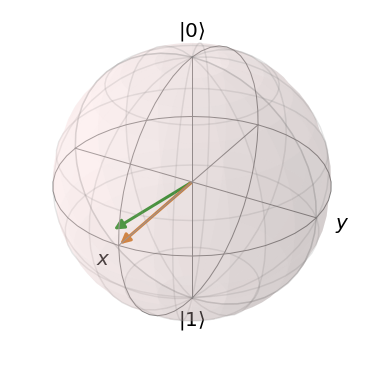

In [35]:
b = Bloch()
b.add_states([end_state, plus_state])
b.make_sphere()

We can also see the noisy pulse:

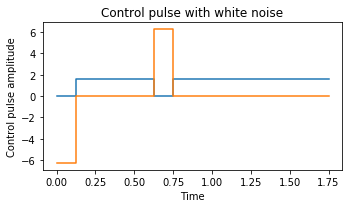

In [36]:
processor.plot_pulses(noisy=False, title="Control pulse with white noise");

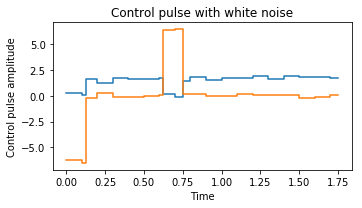

In [37]:
processor.plot_pulses(noisy=True, title="Control pulse with white noise");

### Software versions:

In [25]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.5.0.dev0+c50c4bc9
Numpy,1.16.2
SciPy,1.2.1
matplotlib,3.0.3
Cython,0.29.12
Number of CPUs,12
BLAS Info,INTEL MKL
IPython,7.4.0
Python,"3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]"
OS,nt [win32]
